<a href="https://colab.research.google.com/github/Gakmlr7896/The-influence-of-social-media-on-academic-performance./blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##The influence of social media on academic performance model.
please download the dataset from
https://github.com/Gakmlr7896/The-influence-of-social-media-on-academic-performance./tree/main
and upload the file in the right place so you can run the code.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Load the dataset - We will use study.csv as a real dataset getting it data from a real survey

In [29]:
#Load the dataset
df = pd.read_csv('study.csv')

Display unique values in selected columns to ensure clean, consistent input before applying any mapping or transformations.

"This helps catch typos, unexpected categories, or formatting issues in survey responses."

In [30]:
# Preview unique values for debugging
print("Grades:", df['grades'].unique())
print("Study hours:", df['study_hours'].unique())
print("Social hours:", df['social_hours'].unique())

Grades: ['B (80% - 89%)' 'A (90% - 100%)' 'D or below (less than 70%)'
 'C (70% - 79%)']
Study hours: ['1 - 2 hours' '3 - 5 hours' '6 - 8 hours' 'More than 8 hours'
 'Less than 1 hour']
Social hours: ['3 - 5 hours' 'Less than 1 hour.' 'More than 5 hours' '1 - 2 hours']


Maping.

Maping will convert all the categorical variables into scalars so we can use it in our model.

In [31]:
# Mapping
concentration_map = {'Yes': 2, 'No': 1, 'Not sure': 0}
edu_use_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Frequently': 3}
generation_map = {'Gen Z  (1997 - 2012)': 0, 'Gen Alpha (2013 - 2025)': 1}
during_study_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Always': 3}
study_hours_map = {
    'Less than 1 hour': 0,
    '1 - 2 hours': 1,
    '3 - 5 hours': 2,
    '6 - 8 hours': 3,
    'More than 8 hours': 4
}
grades_map = {
    'A (90% - 100%)': 4,
    'B (80% - 89%)': 3,
    'C (70% - 79%)': 2,
    'D or below (less than 70%)': 1
}
social_hours_map = {
    'Less than 1 hour.': 0,
    '1 - 2 hours': 1,
    '3 - 5 hours': 2,
    'More than 5 hours': 3
}

# Apply mapping
df['ability_to_concentrate'] = df['ability_to_concentrate'].map(concentration_map)
df['educational_use'] = df['educational_use'].map(edu_use_map)
df['during_study_social'] = df['during_study_social'].map(during_study_map)
df['study_hours'] = df['study_hours'].map(study_hours_map)
df['grades'] = df['grades'].map(grades_map)
df['social_hours'] = df['social_hours'].map(social_hours_map)

One-hot encoding.

One-hot encoding was used with variables that do not have a natural order, such as gender and platform, to avoid giving the model misleading signals about the relationships between categories.

In [32]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['platform'], drop_first=True)
df = pd.get_dummies(df, columns=['socialMedia_impact'], drop_first=True)
df = pd.get_dummies(df, columns=['gender'], drop_first=True)
df = pd.get_dummies(df, columns=['generation'], drop_first=True)

We will create a traget varible so we can calculate the efficiency depends on our predictors

In [33]:
# Create target: efficiency score
df['efficiency_score'] = (
    df['study_hours'] * 0.4 +
    df['grades'] * 0.3 +
    df['social_hours'] * 0.3
)
# Drop target components from features
X = df.drop(['efficiency_score', 'study_hours', 'grades', 'social_hours'], axis=1)
y = df['efficiency_score']


Now we will split our data into a training data and a test ones

In [34]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the model & predicting

In [35]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

Evaluating the model using Mse & r2

In [36]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.3f}')
print(f'R^2 Score: {r2:.3f}')

Mean Squared Error: 1.498
R^2 Score: -4.994


Coefficient anaysing so we can analyse the data scientifly

In [37]:
# -------------------------------
# Coefficient analysis
# -------------------------------
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Feature Coefficients (Influence on Efficiency Score):")
print(coef_df)


Feature Coefficients (Influence on Efficiency Score):
                                 Feature  Coefficient
2                 ability_to_concentrate     0.753980
3                        educational_use     0.339401
0                    during_study_social     0.321198
5                       platform_YouTube     0.170764
11       generation_Gen Z  (1997 - 2012)     0.137904
6   socialMedia_impact_Slightly Negative     0.100788
1                   academic_performance     0.032151
10              gender_Prefer not to say     0.000000
8   socialMedia_impact_Strongly Positive    -0.071631
7   socialMedia_impact_Slightly Positive    -0.137904
9                            gender_Male    -0.485422
4                        platform_TikTok    -0.546020


Ploting

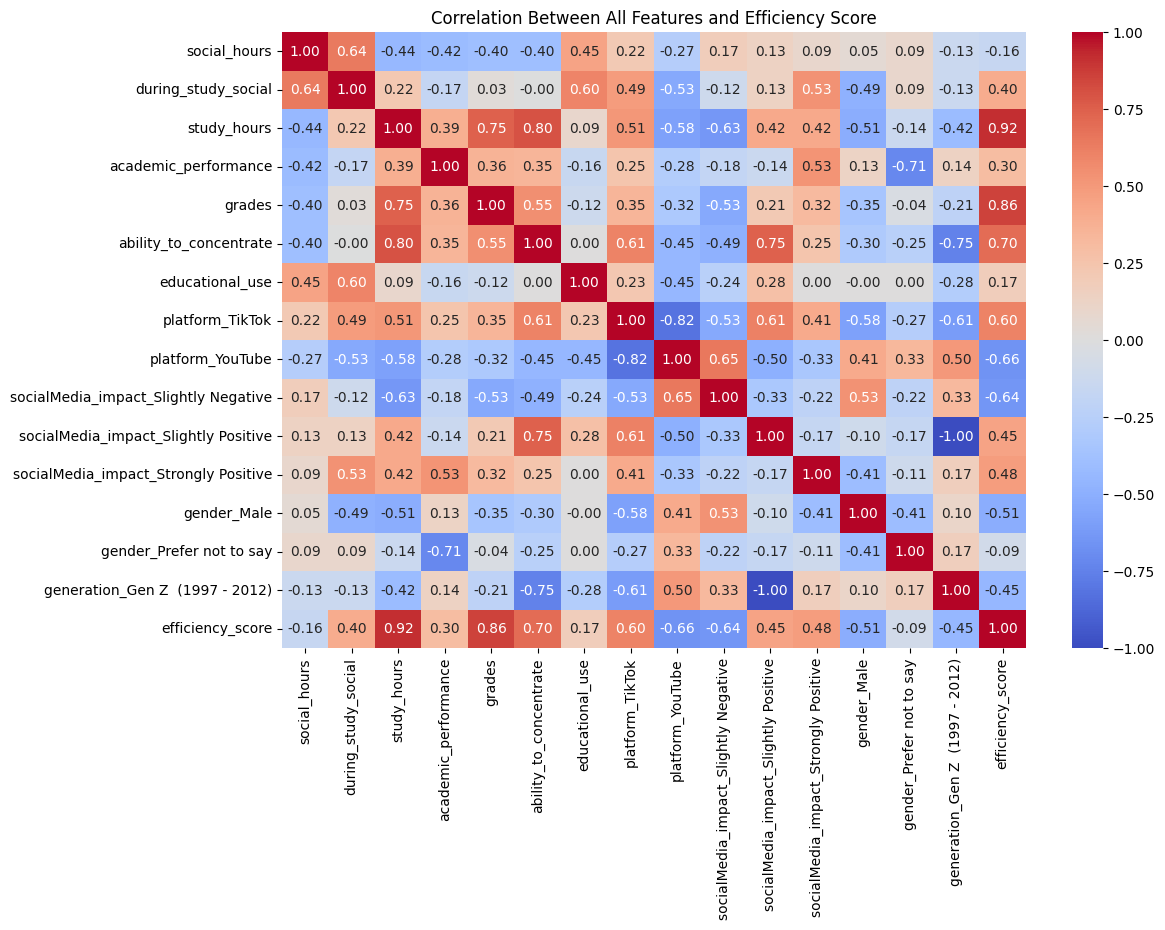

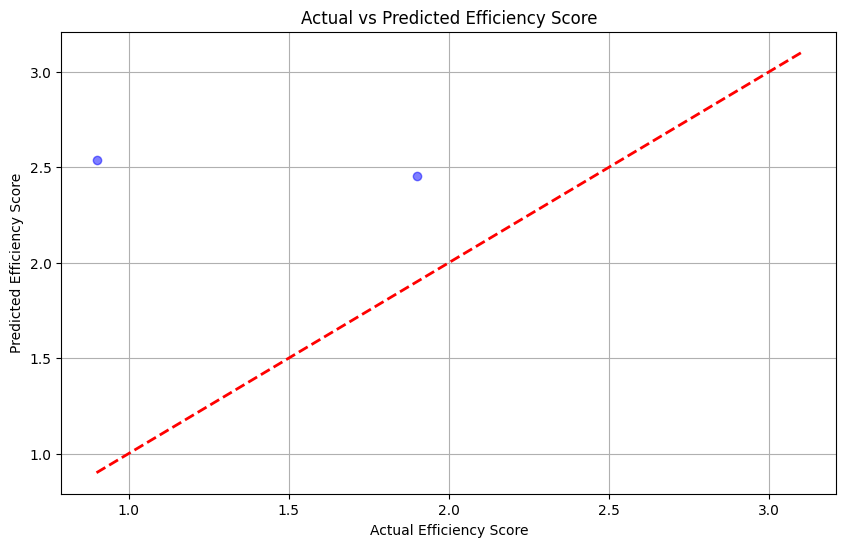

In [38]:
# -------------------------------
# Correlation heatmap
# -------------------------------
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between All Features and Efficiency Score")
plt.show()

#Plotting a linear regression line of the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Efficiency Score')
plt.ylabel('Predicted Efficiency Score')
plt.title('Actual vs Predicted Efficiency Score')
plt.grid()
plt.show()